# Malware Analysis and Detection Using Machine Learning

####       Project Members :

#####        1) Ajinkya Sawant  (Roll Ni 1302)
#####        2) Pawan Wankhade (Roll No 1339)
 

#### Importing Libraries


In [1]:
import pandas as pd # Pandas is mainly used for data analysis
import numpy as np # NumPy stands for 'Numerical Python'. It is an open-source Python library used to perform various mathematical and scientific tasks.
import seaborn as sns
# The seaborn package was developed based on the Matplotlib library. It is used to create more attractive and informative statistical graphics.
sns.set()
import matplotlib.pyplot as plt # Matplotlib is an amazing visualization library in Python for 2D plots of arrays.
# pyplot is a plotting library used for 2D graphics in python programming language.
# Secondly, pyplot is a module in the matplotlib package.
%matplotlib inline
import random
random.seed(1234)

#### Reading Data

In [2]:
df = pd.read_csv("MalwareData.csv",sep ="|")

In [3]:
df.head()

Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3                   0      585728                 369152   
4                   0      294912                 247296   

   SizeOfUninitializedData  ...  ResourcesNb  ResourcesMeanEntropy  \
0                        0  ...            4              3.262823   
1                        0  ...            2              4.250461   
2                        0  ...           11              4.426324   
3                        0  ...           10              4.364291   
4                        0  ...            2              4.306100   

   ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
0             2.568844             3.537939        8797.000000   
1             3.420744             5.080177         837.000000   
2             2.846449             5.271813       31102.272727   
3             2.669314             6.400720        1457.000000   
4             3.421598             5.190603        1074.500000   

   ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
0               216             18032                      0   
1               518              1156                     72   
2               104            270376                     72   
3                90              4264                     72   
4               849              1300                     72   

   VersionInformationSize  legitimate  
0                      16           1  
1                      18           1  
2                      18           1  
3                      18           1  
4                      18           1  

[5 rows x 57 columns]

### Shuffling the data

In [4]:
df=df.sample(frac=1).reset_index()
df

index                                         Name  \
0        96082  VirusShare_fb9bbe1fac5ebfaab5123cb0125d2840   
1       109157  VirusShare_d397acbdd220953f47fadb666db18dba   
2        50793  VirusShare_eec9e295cab221f11eae274e3e5ef12b   
3        34631             api-ms-win-core-debug-l1-1-0.dll   
4        23548                                msfeedsbs.dll   
...        ...                                          ...   
138042  100708  VirusShare_50f41b323a5813553f817ca31c9cb349   
138043  116743  VirusShare_b9857f72b0506175a27e3bc2676c1853   
138044   11229                                 CNBBR297.DLL   
138045   34165     api-ms-win-core-localregistry-l1-1-0.dll   
138046    4304                         GameUXLegacyGDFs.dll   

                                     md5  Machine  SizeOfOptionalHeader  \
0       fb9bbe1fac5ebfaab5123cb0125d2840      332                   224   
1       d397acbdd220953f47fadb666db18dba      332                   224   
2       eec9e295cab221f11eae274e3e5ef12b      332                   224   
3       89b2a848f7710fb7a76015d3c50dfc04    34404                   240   
4       d8dab73876252a70461ec144e8c2b568      332                   224   
...                                  ...      ...                   ...   
138042  50f41b323a5813553f817ca31c9cb349      332                   224   
138043  b9857f72b0506175a27e3bc2676c1853      332                   224   
138044  3a081ad1bfec88a324df9563cd43f35f    34404                   240   
138045  791975499aa55304d8435f928b030a99    34404                   240   
138046  f01ea0997dbc8e7eea367ff7b866ab34      332                   224   

        Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                   783                   2                  56       30720   
1                   258                   9                   0      465408   
2                   271                   6                   0       20480   
3                  8226                   9                   0         512   
4                  8450                   8                   0       48640   
...                 ...                 ...                 ...         ...   
138042              258                   8                   0        7680   
138043              259                  10                   0       59904   
138044             8226                   9                   0           0   
138045             8226                   9                   0        1536   
138046             8450                   9                   0           0   

        SizeOfInitializedData  ...  ResourcesNb  ResourcesMeanEntropy  \
0                       14848  ...            8              4.091269   
1                      336384  ...           59              2.831327   
2                       49152  ...           11              4.598340   
3                        1536  ...            1              3.569508   
4                        6144  ...            2              3.105979   
...                       ...  ...          ...                   ...   
138042                 307200  ...            6              3.402385   
138043                 230912  ...            0              0.000000   
138044                  96768  ...           42              4.012152   
138045                   1536  ...            1              3.548316   
138046                4239872  ...         2073              3.654830   

        ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
0                  2.458492             5.869969        2088.750000   
1                  0.960953             7.212329        2641.525424   
2                  2.890969             6.149535        2390.545455   
3                  3.569508             3.569508         908.000000   
4                  2.676833             3.535124         586.000000   
...                     ...                  ...                ...   
138042             2.097487 

In [5]:
#  The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. 
df.describe()

index        Machine  SizeOfOptionalHeader  Characteristics  \
count  138047.000000  138047.000000         138047.000000    138047.000000   
mean    69023.000000    4259.069274            225.845632      4444.145994   
std     39850.880643   10880.347245              5.121399      8186.782524   
min         0.000000     332.000000            224.000000         2.000000   
25%     34511.500000     332.000000            224.000000       258.000000   
50%     69023.000000     332.000000            224.000000       258.000000   
75%    103534.500000     332.000000            224.000000      8226.000000   
max    138046.000000   34404.000000            352.000000     49551.000000   

       MajorLinkerVersion  MinorLinkerVersion    SizeOfCode  \
count       138047.000000       138047.000000  1.380470e+05   
mean             8.619774            3.819286  2.425956e+05   
std              4.088757           11.862675  5.754485e+06   
min              0.000000            0.000000  0.000000e+00   
25%              8.000000            0.000000  3.020800e+04   
50%              9.000000            0.000000  1.136640e+05   
75%             10.000000            0.000000  1.203200e+05   
max            255.000000          255.000000  1.818587e+09   

       SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
count           1.380470e+05             1.380470e+05         1.380470e+05   
mean            4.504867e+05             1.009525e+05         1.719561e+05   
std             2.101599e+07             1.635288e+07         3.430553e+06   
min             0.000000e+00             0.000000e+00         0.000000e+00   
25%             2.457600e+04             0.000000e+00         1.272100e+04   
50%             2.631680e+05             0.000000e+00         5.288300e+04   
75%             3.850240e+05             0.000000e+00         6.157800e+04   
max             4.294966e+09             4.294941e+09         1.074484e+09   

       ...    ResourcesNb  ResourcesMeanEntropy  ResourcesMinEntropy  \
count  ...  138047.000000         138047.000000        138047.000000   
mean   ...      22.050700              4.000127             2.434541   
std    ...     136.494244              1.112981             0.815577   
min    ...       0.000000              0.000000             0.000000   
25%    ...       5.000000              3.458505             2.178748   
50%    ...       6.000000              3.729824             2.458492   
75%    ...      13.000000              4.233051             2.696833   
max    ...    7694.000000              7.999723             7.999723   

       ResourcesMaxEntropy  ResourcesMeanSize  ResourcesMinSize  \
count        138047.000000       1.380470e+05      1.380470e+05   
mean              5.521610       5.545093e+04      1.818082e+04   
std               1.597403       7.799163e+06      6.502369e+06   
min               0.000000       0.000000e+00      0.000000e+00   
25%               4.828706       9.560000e+02      4.800000e+01   
50%               5.317552       2.708154e+03      4.800000e+01   
75%               6.502239       6.558429e+03      1.320000e+02   
max               8.000000       2.415919e+09      2.415919e+09   

       ResourcesMaxSize  LoadConfigurationSize  VersionInformationSize  \
count      1.380470e+05           1.380470e+05           138047.000000   
mean       2.465903e+05           4.656750e+05               12.363115   
std        2.124860e+07           2.608987e+07                6.798878   
min        0.000000e+00           0.000000e+00                0.000000   
25%        2.216000e+03           0.000000e+00               13.000000   
50%        9.640000e+03           7.200000e+01               15.000000   
75%        2.378000e+04           7.200000e+01               16.000000   
max        4.294903e+09           4.294967e+09               26.000000   

          legitimate  
count  138047.000000  
mean        0.299340  
std         0.457971  
min         0.000000  
25%   

In [6]:
# This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        138047 non-null  int64  
 1   Name                         138047 non-null  object 
 2   md5                          138047 non-null  object 
 3   Machine                      138047 non-null  int64  
 4   SizeOfOptionalHeader         138047 non-null  int64  
 5   Characteristics              138047 non-null  int64  
 6   MajorLinkerVersion           138047 non-null  int64  
 7   MinorLinkerVersion           138047 non-null  int64  
 8   SizeOfCode                   138047 non-null  int64  
 9   SizeOfInitializedData        138047 non-null  int64  
 10  SizeOfUninitializedData      138047 non-null  int64  
 11  AddressOfEntryPoint          138047 non-null  int64  
 12  BaseOfCode                   138047 non-null  int64  
 13 

In [7]:
# Drop the Index Column
df = df.drop(["index"],axis=1)
df

Name  \
0       VirusShare_fb9bbe1fac5ebfaab5123cb0125d2840   
1       VirusShare_d397acbdd220953f47fadb666db18dba   
2       VirusShare_eec9e295cab221f11eae274e3e5ef12b   
3                  api-ms-win-core-debug-l1-1-0.dll   
4                                     msfeedsbs.dll   
...                                             ...   
138042  VirusShare_50f41b323a5813553f817ca31c9cb349   
138043  VirusShare_b9857f72b0506175a27e3bc2676c1853   
138044                                 CNBBR297.DLL   
138045     api-ms-win-core-localregistry-l1-1-0.dll   
138046                         GameUXLegacyGDFs.dll   

                                     md5  Machine  SizeOfOptionalHeader  \
0       fb9bbe1fac5ebfaab5123cb0125d2840      332                   224   
1       d397acbdd220953f47fadb666db18dba      332                   224   
2       eec9e295cab221f11eae274e3e5ef12b      332                   224   
3       89b2a848f7710fb7a76015d3c50dfc04    34404                   240   
4       d8dab73876252a70461ec144e8c2b568      332                   224   
...                                  ...      ...                   ...   
138042  50f41b323a5813553f817ca31c9cb349      332                   224   
138043  b9857f72b0506175a27e3bc2676c1853      332                   224   
138044  3a081ad1bfec88a324df9563cd43f35f    34404                   240   
138045  791975499aa55304d8435f928b030a99    34404                   240   
138046  f01ea0997dbc8e7eea367ff7b866ab34      332                   224   

        Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0                   783                   2                  56       30720   
1                   258                   9                   0      465408   
2                   271                   6                   0       20480   
3                  8226                   9                   0         512   
4                  8450                   8                   0       48640   
...                 ...                 ...                 ...         ...   
138042              258                   8                   0        7680   
138043              259                  10                   0       59904   
138044             8226                   9                   0           0   
138045             8226                   9                   0        1536   
138046             8450                   9                   0           0   

        SizeOfInitializedData  SizeOfUninitializedData  ...  ResourcesNb  \
0                       14848                   154624  ...            8   
1                      336384                        0  ...           59   
2                       49152                        0  ...           11   
3                        1536                        0  ...            1   
4                        6144                        0  ...            2   
...                       ...                      ...  ...          ...   
138042                 307200                        0  ...            6   
138043                 230912                        0  ...            0   
138044                  96768                        0  ...           42   
138045                   1536                        0  ...            1   
138046                4239872                        0  ...         2073   

        ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0                   4.091269             2.458492             5.869969   
1                   2.831327             0.960953             7.212329   
2                   4.598340             2.890969             6.149535   
3                   3.569508             3.569508             3.569508   
4                   3.105979             2.676833             3.535124   
...                      ...                  ...                  ...   
138042              3.402385             2.097487             5.155409   
138043              0.000000   

In [8]:
# The shape is use for printing the value of Rows and Columns
df.shape

(138047, 57)

### Notes : 
### Here the **Legitimate files or the Clean Files** contain **(.exe) and (.dll) extension** format
### whereas file names **start with "VirusShare_"** are the **malware files**
### Clean(System) File -----> 1
### Malecious File ---->0 

In [9]:
# showing total numbers of 0 (Malecious File) and 1 (Clean File) in legitimate columns

df['legitimate'].value_counts()
#index_1 = df["legitimate"] == 1
#df[index_1].count()
#index = df["legitimate"] == 0
#df[index].count()

0    96724
1    41323
Name: legitimate, dtype: int64

In [10]:
# display all columns name
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

### Correlation
#### Pearson Correlation.

In [11]:
corr = df.corr("pearson")
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\ajink\AppData\Local\Temp/ipykernel_4724/4102759603.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


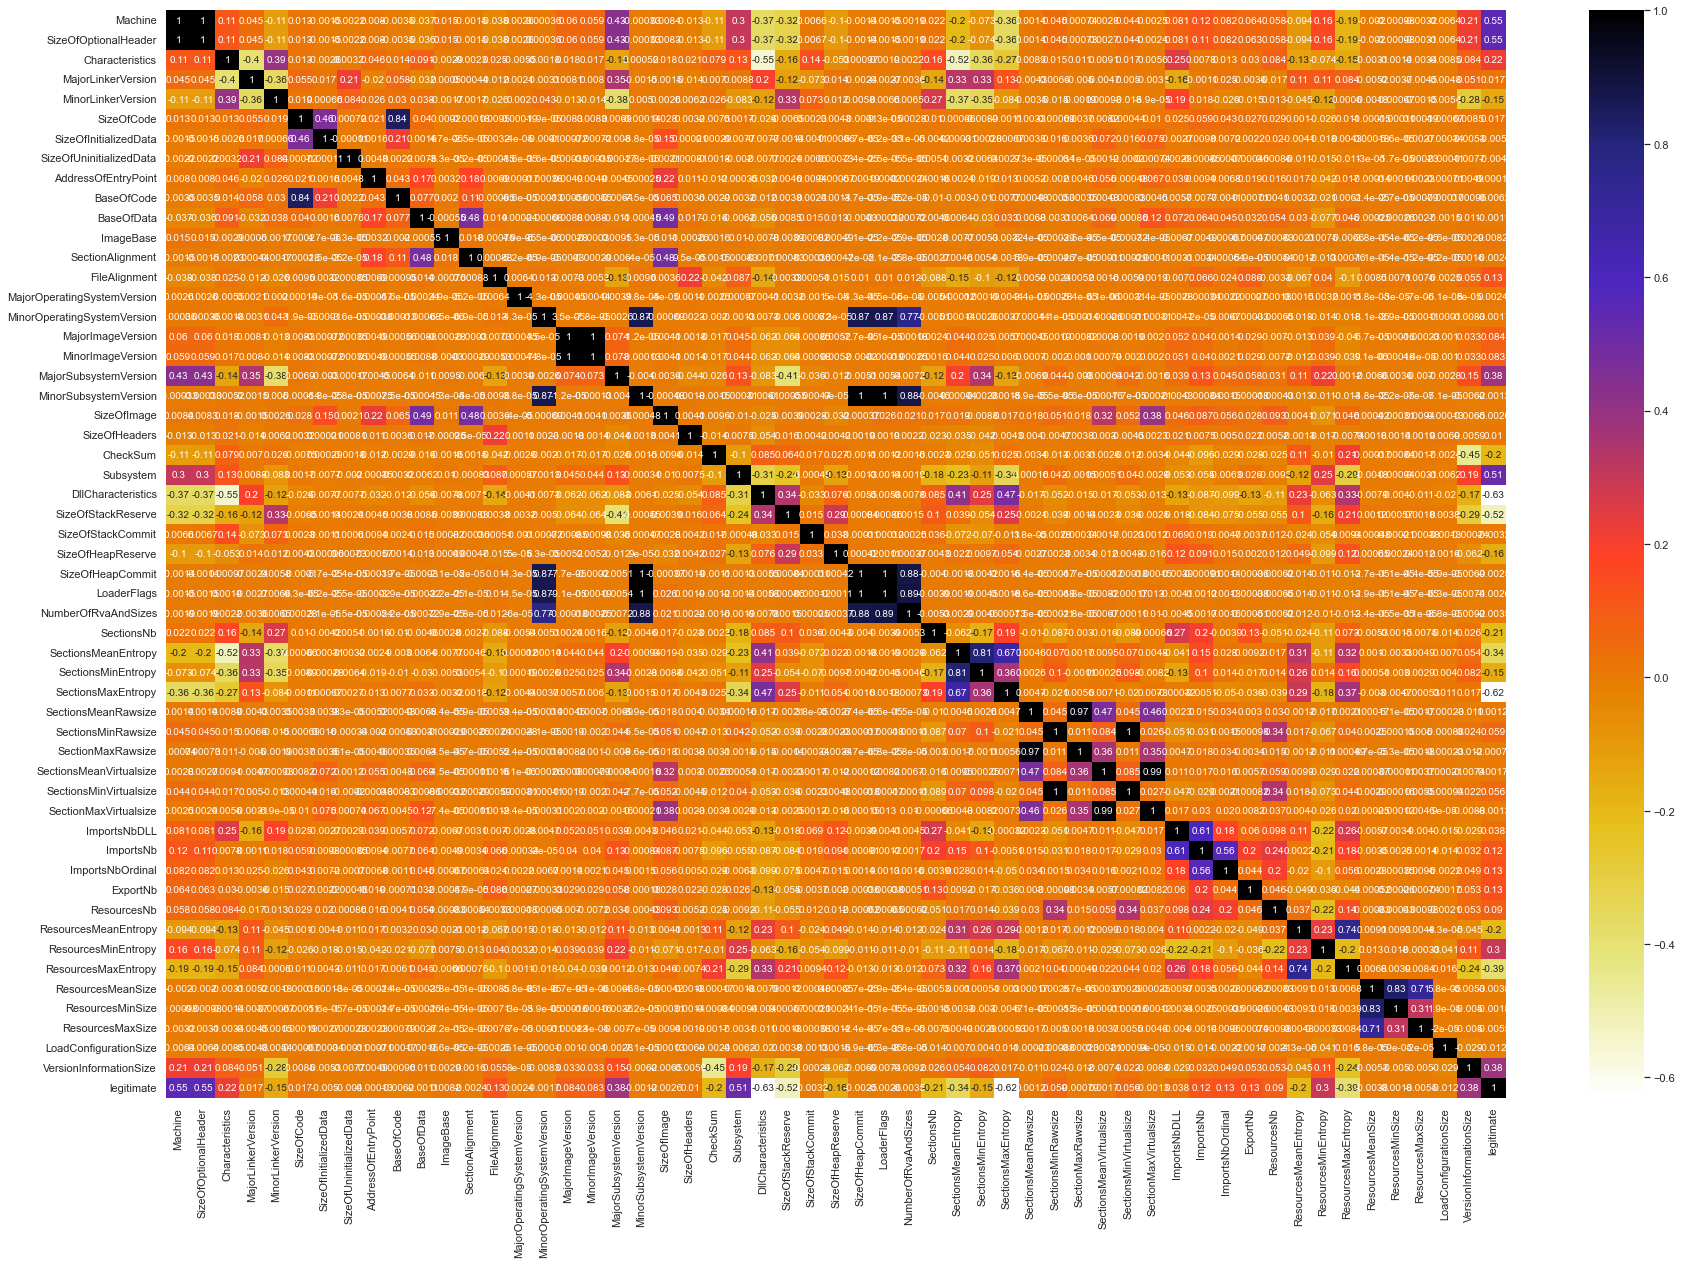

In [12]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Find the correlation between every pair of columns
### Correlation: 
### +1 to -1
### +1 highest positive correlation
### -1 highest negative correlation
### 0 there is no correlation or two variables are independent of each other


# Features Selection :
## Correlation with output variable
### Print all those columns which have 
### absolute correlation with target column (legitimate) > 0.2

In [13]:
corr_target = abs(corr['legitimate'])

In [14]:
print(corr_target.sort_values())

AddressOfEntryPoint            0.000134
SectionMaxRawsize              0.000790
BaseOfData                     0.001136
SectionsMeanRawsize            0.001175
MinorSubsystemVersion          0.001213
SectionMaxVirtualsize          0.001332
MinorOperatingSystemVersion    0.001702
SectionsMeanVirtualsize        0.001734
ResourcesMinSize               0.001774
MajorOperatingSystemVersion    0.002402
SectionAlignment               0.002429
SizeOfHeapCommit               0.002506
SizeOfImage                    0.002603
LoaderFlags                    0.002649
SizeOfStackCommit              0.003226
NumberOfRvaAndSizes            0.003523
ResourcesMeanSize              0.003824
SizeOfUninitializedData        0.003997
SizeOfInitializedData          0.004958
ResourcesMaxSize               0.005529
BaseOfCode                     0.006232
ImageBase                      0.008245
SizeOfHeaders                  0.010125
LoadConfigurationSize          0.011666
MajorLinkerVersion             0.017320


## Selecting highly correlated features

In [15]:
relevant_features = corr_target[corr_target>0.2]
relevant_features
df1 = relevant_features.sort_values()
df1

ResourcesMeanEntropy      0.202432
SectionsNb                0.207782
Characteristics           0.221956
ResourcesMinEntropy       0.299112
SectionsMeanEntropy       0.343933
VersionInformationSize    0.379646
MajorSubsystemVersion     0.380393
ResourcesMaxEntropy       0.392855
Subsystem                 0.514352
SizeOfStackReserve        0.521642
SizeOfOptionalHeader      0.547498
Machine                   0.548835
SectionsMaxEntropy        0.624229
DllCharacteristics        0.630177
legitimate                1.000000
Name: legitimate, dtype: float64

In [16]:
col = ["ResourcesMeanEntropy","SectionsNb","Characteristics","ResourcesMinEntropy","SectionsMeanEntropy","VersionInformationSize","MajorSubsystemVersion","ResourcesMaxEntropy","Subsystem","SizeOfStackReserve","SizeOfOptionalHeader","Machine","SizeOfOptionalHeader","DllCharacteristics"]
df2 = df[col]
df2.head()

ResourcesMeanEntropy  SectionsNb  Characteristics  ResourcesMinEntropy  \
0              4.091269           7              783             2.458492   
1              2.831327           5              258             0.960953   
2              4.598340           4              271             2.890969   
3              3.569508           3             8226             3.569508   
4              3.105979           4             8450             2.676833   

   SectionsMeanEntropy  VersionInformationSize  MajorSubsystemVersion  \
0             3.392243                       0                      4   
1             5.158864                       0                      5   
2             4.357771                      20                      4   
3             2.288913                      16                      6   
4             4.036230                      17                      5   

   ResourcesMaxEntropy  Subsystem  SizeOfStackReserve  SizeOfOptionalHeader  \
0             5.869969          2             2097152                   224   
1             7.212329          2             1048576                   224   
2             6.149535          2             1048576                   224   
3             3.569508          3              262144                   240   
4             3.535124          2              262144                   224   

   Machine  SizeOfOptionalHeader  DllCharacteristics  
0      332                   224               32768  
1      332                   224               33088  
2      332                   224                   0  
3    34404                   240                 320  
4      332                   224                 320

## Visualization

C:\Users\ajink\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajink\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajink\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

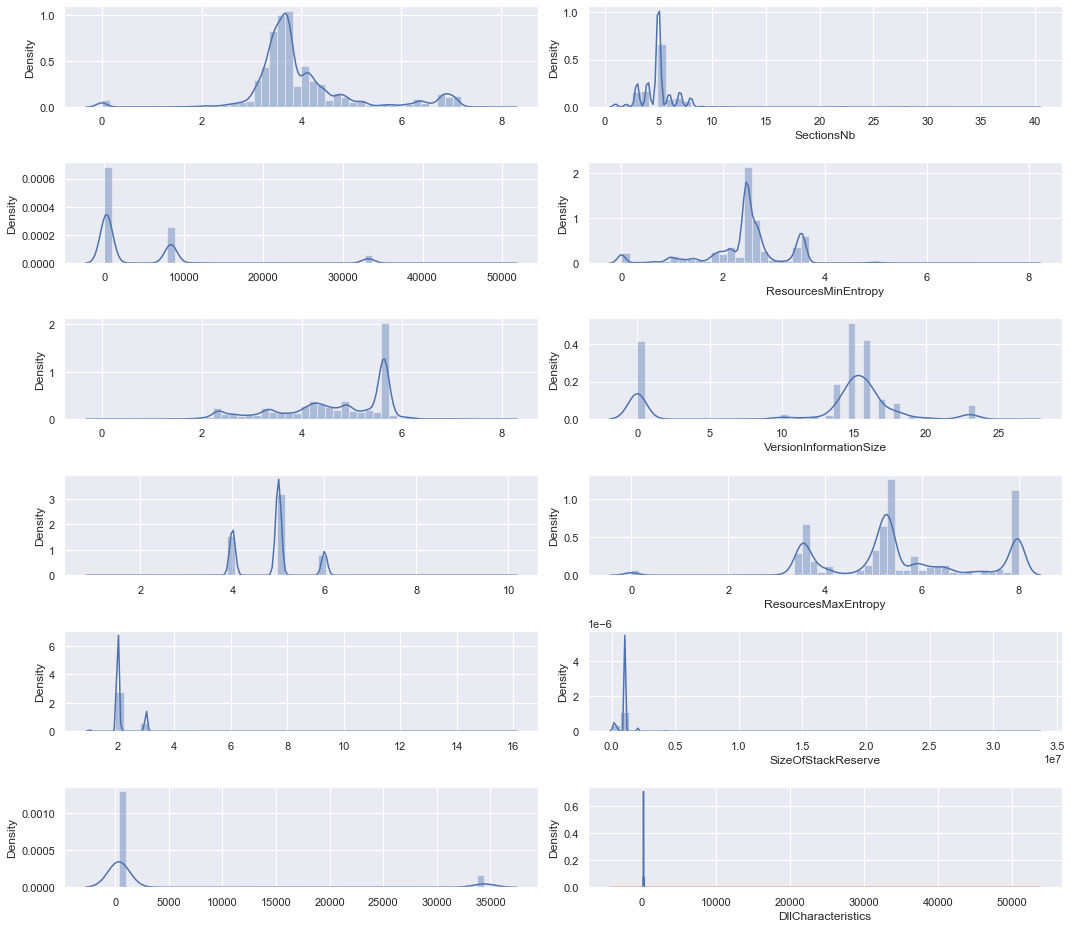

In [17]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.distplot(x= df["ResourcesMeanEntropy"], ax = ax[0,0])
sns.distplot(df['SectionsNb'], ax = ax[0,1])
sns.distplot(x= df["Characteristics"], ax = ax[1,0])
sns.distplot(df['ResourcesMinEntropy'], ax = ax[1,1])
sns.distplot(x= df["SectionsMeanEntropy"], ax = ax[2,0])
sns.distplot(df['VersionInformationSize'], ax = ax[2,1])
sns.distplot(x= df["MajorSubsystemVersion"], ax = ax[3,0])
sns.distplot(df['ResourcesMaxEntropy'], ax = ax[3,1])
sns.distplot(x= df["Subsystem"], ax = ax[4,0])
sns.distplot(df['SizeOfStackReserve'], ax = ax[4,1])
sns.distplot(x= df["Machine"], ax = ax[5,0])
sns.distplot(df['SizeOfOptionalHeader'], ax = ax[5,1])
sns.distplot(df['DllCharacteristics'], ax = ax[5,1])
plt.tight_layout()

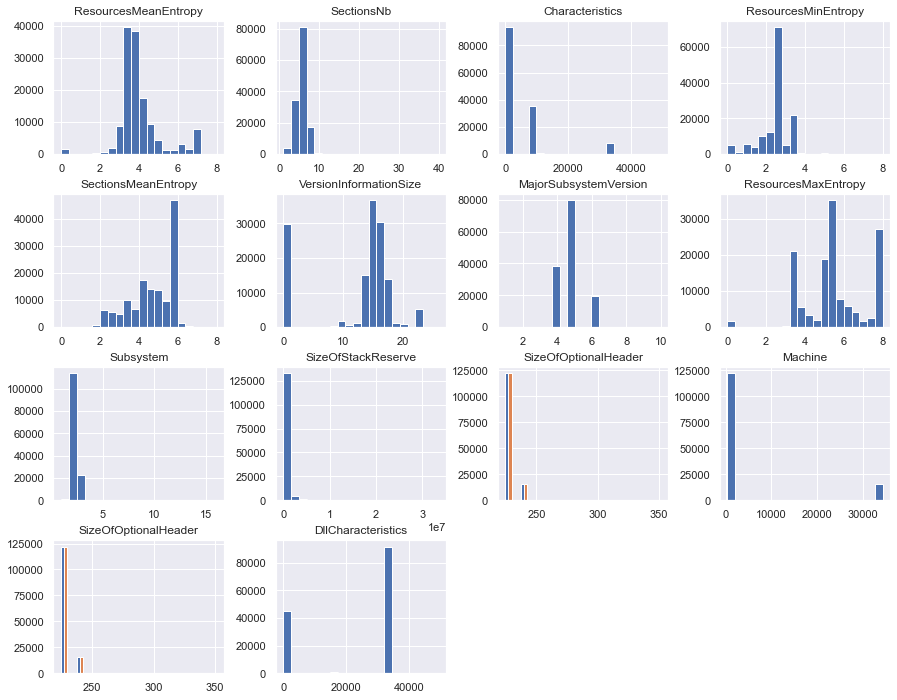

In [18]:
df2.hist(figsize=(15,12),bins=20)
plt.show()

## Split the data in X and Y
here*** Y will be Legitimate*** and **all the other 14 features will be X**
So after executing this code X and Y will be Seperated
after seperation check the shape of the Data
**there should always be only one column in Y shape OR No of rows in both X and Y should be same**

In [19]:
X = df[["ResourcesMeanEntropy","SectionsNb","Characteristics","ResourcesMinEntropy","SectionsMeanEntropy","VersionInformationSize","MajorSubsystemVersion","ResourcesMaxEntropy","Subsystem","SizeOfStackReserve","SizeOfOptionalHeader","Machine","SizeOfOptionalHeader","DllCharacteristics"]]
Y = df['legitimate'] 

## Split the data in Training and testing
### To Check the shape of X train and test , Y train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((96632, 14), (41415, 14), (96632,), (41415,))

## Apply Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [23]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
accuracy1 = (dtc.score(X_test, Y_test))*100
accuracy1

99.04382470119522

### Construct a Tree using Graphviz

In [25]:
import graphviz
from sklearn import tree
TREE = tree.export_graphviz(dtc, out_file=None, 
                        feature_names=list(X_train),  
                       filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(TREE)  
graph 

# Ensemble techniques

## **Apply Random Forest Classifier** 

In [26]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(n_estimators=50,random_state=7)


### fit the model in X_train and Y_train

In [27]:
rcf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=7)

## Predict the Accuracy and Score 

In [50]:
accuracy2 = (rcf.score(X_test, Y_test))*100
accuracy2

99.34806229626946

### Draw the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
result = rcf.predict(X_test)
conf = confusion_matrix(Y_test,result)
conf

array([[28815,   158],
       [  112, 12330]], dtype=int64)

In [31]:
type(conf)

numpy.ndarray

In [47]:
print("False Positive : ",conf[0][1]/sum(conf[0])*100)
print("False Negative : ",conf[1][0]/sum(conf[1])*100)

False Positive :  0.5453353121872088
False Negative :  0.9001768204468735


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28973
           1       0.99      0.99      0.99     12442

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



## **Apply Gradient Boosting Classifier** 

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)

### fit the model in X_train and Y_train

In [35]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=50)

### Predict the Accuracy and Score 

In [36]:
gbc.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
accuracy3 = (gbc.score(X_test, Y_test))*100
accuracy3

98.62610165399009

In [81]:
x= ["Decision Tree","Random Forest","Gradient Boost"]
y =np.array([accuracy1, accuracy2, accuracy3])

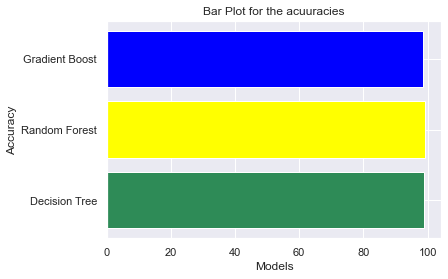

In [85]:
plt.barh(x,y,color=['seagreen', 'yellow', 'blue'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Bar Plot for the acuuracies')
plt.show()


## **Performing the Prediction-model on the Sample Test Data** 

In [38]:
t = X_test.head(1)
t

ResourcesMeanEntropy  SectionsNb  Characteristics  ResourcesMinEntropy  \
94191              3.672881           5              258             2.458492   

       SectionsMeanEntropy  VersionInformationSize  MajorSubsystemVersion  \
94191              5.63083                      15                      5   

       ResourcesMaxEntropy  Subsystem  SizeOfStackReserve  \
94191             5.317552          2             1048576   

       SizeOfOptionalHeader  Machine  SizeOfOptionalHeader  DllCharacteristics  
94191                   224      332                   224               33088

In [39]:
t=np.array(t)
t

array([[3.67288131e+00, 5.00000000e+00, 2.58000000e+02, 2.45849223e+00,
        5.63083048e+00, 1.50000000e+01, 5.00000000e+00, 5.31755236e+00,
        2.00000000e+00, 1.04857600e+06, 2.24000000e+02, 3.32000000e+02,
        2.24000000e+02, 3.30880000e+04]])

In [40]:
result = rcf.predict(t)
result

array([0], dtype=int64)

In [41]:
result[0]

0

In [42]:
Y_test.head(1)

94191    0
Name: legitimate, dtype: int64

In [43]:
df.iloc[94191]

Name                           VirusShare_a98e7281229de8429c3d803e7e52caae
md5                                       a98e7281229de8429c3d803e7e52caae
Machine                                                                332
SizeOfOptionalHeader                                                   224
Characteristics                                                        258
MajorLinkerVersion                                                      10
MinorLinkerVersion                                                       0
SizeOfCode                                                          120320
SizeOfInitializedData                                               385024
SizeOfUninitializedData                                                  0
AddressOfEntryPoint                                                  61658
BaseOfCode                                                            4096
BaseOfData                                                          126976
ImageBase                

In [44]:
import pickle
with open ("model.pkl","wb") as file:
    pickle.dump(rcf,file)

In [45]:
with open("model.pkl","rb") as file:
    model = pickle.load(file)

In [46]:
print(model.predict(t))

[0]
